In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
from scipy import optimize
from consav import linear_interp

# load the DurableConsumptionModel module
from HousingModel import HousingModelClass

# Set the number of threads in numba
nb.set_num_threads(4)

In [2]:
# Define the model
model = HousingModelClass(name='example_negm',par={'solmethod':'negm', 'do_print':False})

# Solve and simulate
model.precompile_numba()

In [3]:
model.par.ph = 1.0

model.solve()

In [4]:
model.simulate()

In [5]:
# model.solve_path()

In [6]:
# model.simulate_path()

Test policy functions

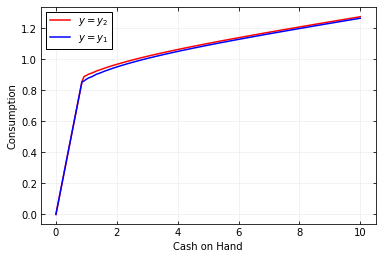

In [7]:
# Initialize the figure
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

# Plot the avalanche sizes
ax.plot(model.par.grid_m, model.sol.c_keep[0,0,1,5,:], color = 'red', linewidth = '1.5', label = r'$y=y_2$')
ax.plot(model.par.grid_m, model.sol.c_keep[0,0,0,5,:], color = 'blue', linewidth = '1.5', label = r'$y=y_1$')

# Plot setting
ax.set_xlabel('Cash on Hand')
ax.set_ylabel('Consumption')

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')
ax.legend(frameon = True, edgecolor = 'k', facecolor = 'white', framealpha=1, fancybox=False)

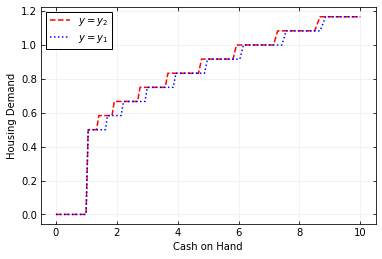

In [8]:
# Initialize the figure
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

# Plot the avalanche sizes
ax.plot(model.par.grid_m, model.sol.d_adj[0,0,1,:], linestyle = '--', color = 'red', linewidth = '1.5', label = r'$y=y_2$')
ax.plot(model.par.grid_m, model.sol.d_adj[0,0,0,:], linestyle = ':', color = 'blue', linewidth = '1.5', label = r'$y=y_1$')

# Plot setting
ax.set_xlabel('Cash on Hand')
ax.set_ylabel('Housing Demand')

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')
ax.legend(frameon = True, edgecolor = 'k', facecolor = 'white', framealpha=1, fancybox=False)

# plt.savefig('../../tex/figs/h_adj.pdf')

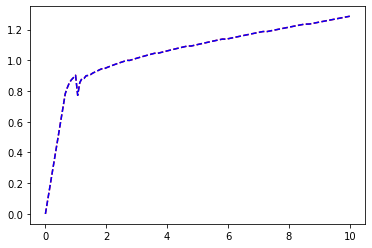

In [9]:
# plt.plot(model.par.grid_m, model.sol_path.d_adj[0,0,0,:], linestyle = '-', color = 'red', linewidth = '1.5')
# plt.plot(model.par.grid_m, model.sol_path.d_adj[0,0,1,:], linestyle = '-', color = 'blue', linewidth = '1.5')

plt.plot(model.par.grid_m, model.sol.c_adj[0,1,1,:], linestyle = '--', color = 'red', linewidth = '1.5')
plt.plot(model.par.grid_m, model.sol.c_adj[0,0,1,:], linestyle = '--', color = 'blue', linewidth = '1.5')

In [16]:
np.mean(model.sim.d[-1,:])

0.6360668936936261

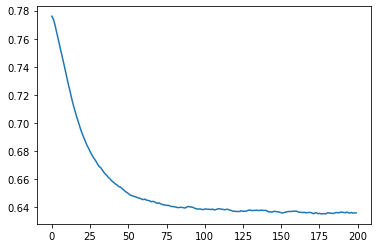

In [10]:
plt.plot(np.mean(model.sim.d, axis=1))

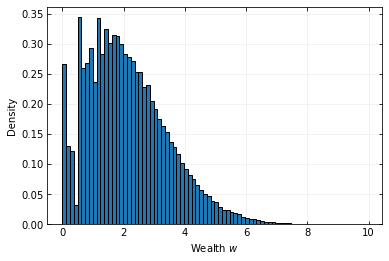

In [15]:
# Define wealth
w = model.sim.a + model.par.ph*model.sim.d
# w = model.sim.a

# Initialize the figure
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

# Plot the avalanche sizes
ax.hist(w[-1,:], bins = 80, density = True, edgecolor = 'k', zorder=2)

# Plot setting
ax.set_xlabel('Wealth $w$')
ax.set_ylabel('Density')

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')

# plt.savefig('../../tex/figs/w_distr.pdf')

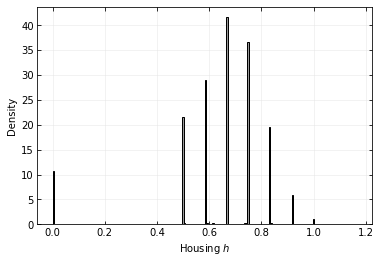

In [12]:
# Initialize the figure
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

# Plot the avalanche sizes
ax.hist(model.sim.d[-1,:], bins = 200, density = True, facecolor='0.6', edgecolor = 'k', zorder=2)
# ax.hist(model.sim.d[-1,:], bins = 100, density = False, facecolor='0.6', edgecolor = 'k', zorder=2)

# Plot setting
ax.set_xlabel('Housing $h$')
ax.set_ylabel('Density')

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')
plt.show()

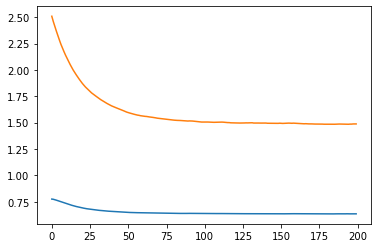

In [13]:
plt.plot(np.mean(model.sim.d, axis=1))
plt.plot(np.mean(model.sim.a, axis=1))